In [3]:
import pandas as pd

data = pd.read_csv('../db/dataset_tissue.txt', header=None, sep=' ')

In [4]:
labels = pd.read_csv('../db/clase.txt', header=None)

In [8]:
print(data)

                                                       0
0      ,"GSM11805.CEL.gz","GSM11814.CEL.gz","GSM11823...
1      1007_s_at,10.1912666822211,10.5091673351314,10...
2      1053_at,6.04046250272039,6.69607547976383,6.14...
3      117_at,7.44740927631719,7.77535403522073,7.696...
4      121_at,12.0250418580982,12.0078171043575,11.63...
...                                                  ...
22211  91703_at,6.43485083964546,7.6769887682576,6.42...
22212  91816_f_at,5.70044827295955,6.56647865392162,5...
22213  91826_at,9.21116303052509,9.41598030255139,8.1...
22214  91920_at,8.33913007018526,8.21442605889894,8.4...
22215  91952_at,7.36779705423511,7.9177537650076,7.59...

[22216 rows x 1 columns]


In [6]:
print(labels)

         0         1
0      NaN         x
1      1.0    kidney
2      2.0    kidney
3      3.0    kidney
4      4.0    kidney
..     ...       ...
185  185.0  placenta
186  186.0  placenta
187  187.0  placenta
188  188.0  placenta
189  189.0  placenta

[190 rows x 2 columns]


# normalizando data

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a tus datos
normalized_data = scaler.fit_transform(data)


In [23]:
print(normalized_data)

[[0.59393386 0.62238993 0.59900423 ... 0.56457949 0.55878495 0.59812501]
 [0.17647815 0.24226738 0.1895741  ... 0.23702274 0.24599605 0.27041106]
 [0.31797795 0.34985936 0.3434884  ... 0.27759091 0.27520512 0.308571  ]
 ...
 [0.49536263 0.51341143 0.39275797 ... 0.44124918 0.38308577 0.50981068]
 [0.40766032 0.39362993 0.41886574 ... 0.40134606 0.42280006 0.401091  ]
 [0.30997117 0.36405502 0.33378935 ... 0.3564532  0.32583744 0.37338301]]


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler  # Agregamos la importación

skip_rows = 1  # omitir la primera fila
data = pd.read_csv('../db/dataset_tissue.txt', skiprows=skip_rows, header=None, sep=',')  # Cambiar el separador a ','

# Eliminar la primera columna que contiene identificadores de genes
data = data.iloc[:, 1:]

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max a tus datos
normalized_data = scaler.fit_transform(data)

# Especificar el número de componentes principales a retener
n_components = 10

# Crear una instancia de PCA con el número de componentes
pca = PCA(n_components=n_components)

# Ajustar y transformar los datos con PCA
data_pca = pca.fit_transform(normalized_data)


In [28]:
print(data_pca)

[[ 4.00348016  0.33857487 -0.6251264  ... -0.05279414 -0.08566336
   0.39026094]
 [-1.73972518 -0.16959045 -0.14137785 ... -0.05424736  0.09434453
   0.06035869]
 [ 0.60699112 -0.26259399  0.3345809  ...  0.13180037  0.12405758
   0.05959855]
 ...
 [ 0.70591661 -0.32843881 -0.26138034 ...  0.07785849 -0.04572541
  -0.00986387]
 [ 1.81609239  0.31259468  0.11254222 ...  0.24398219 -0.05425528
   0.32944385]
 [ 0.74111991 -0.03251617 -0.0723081  ...  0.12945562  0.03598031
  -0.01199076]]


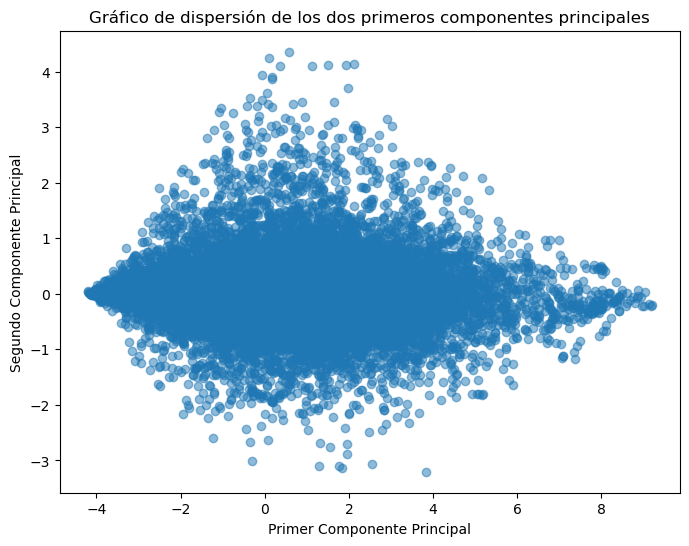

In [27]:
import matplotlib.pyplot as plt

# Extraer los dos primeros componentes principales
component1 = data_pca[:, 0]
component2 = data_pca[:, 1]

# Dibuja un gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(component1, component2, alpha=0.5)
plt.title('Gráfico de dispersión de los dos primeros componentes principales')
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()


# K-Means

In [29]:
import random
import numpy as np

#Devuelve la distancia entre 2 vectores.
#Pruebe con varias funciones de distancia.
def distance(v1,v2):
  return np.linalg.norm(v1 - v2)


In [30]:
# Inicialice los k centroides tomando aleatoriamente k elementos de los datos para que cada
# centroide tenga una ubicación inicial en el espacio de características.
# Nota, puede mejorar este algoritmo, inicializando los centroides de manera más inteligente.
def Init_Centroide(data, k):
    centroides = set()
    num_pixels = data.shape[0]

    while len(centroides) < k:
        rand_index = np.random.randint(0, num_pixels)
        centroid = tuple(data[rand_index])
        centroides.add(centroid)
        centroides_iniciales = np.array(list(centroides))
    return centroides_iniciales

In [37]:
# Dado que los grupos se han formado previamente, se pueden obtener nuevos
# centroides calculando el vector promedio de cada grupo.

def return_new_centroide(grupos, data,k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[grupos == i]
        if len(points_in_cluster) == 0:
            new_centroid = data[np.random.choice(data.shape[0], 1, replace=False)]
        else:
            new_centroid = np.mean(points_in_cluster, axis=0)
        print(f"New centroid for cluster {i}: {new_centroid}")
        new_centroids.append(new_centroid)
    return np.array(new_centroids, dtype=object)

In [38]:
# La función devuelve un vector de números entre 0 y k-1, donde cada valor indica la clase
# a la que pertenece cada elemento del dataset.
def get_cluster(data, centroids):
    clusters = np.zeros(len(data))
    for i in range(len(data)):
        distances = [distance(data[i], centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters[i] = cluster
    return clusters

In [39]:
# Halla la distancia promedio entre los antiguos centroides y los nuevos centroides para evaluar
# la convergencia del algoritmo K-Means y determinar si se debe continuar con la iteración.
def distancia_promedio_centroides(old_centroide, new_centroide):
    suma_d= 0
    if old_centroide.shape != new_centroide.shape:
        raise ValueError("Las dimensiones deben coincidir")
    for i in range(old_centroide.shape[0]):
        suma_d += distance(old_centroide[i], new_centroide[i])
    return suma_d / old_centroide.shape[0]

In [40]:
# Este es el algoritmo K-Means. Debe retornar los centroides y los clusters
# generados para poder utilizarlos en análisis posteriores.
def kmeans(data, k, umbral):
  centroides =  Init_Centroide(data,k)
  clusters   =  get_cluster(data,centroides)
  new_centroides = return_new_centroide(clusters, data,k)
  print("old", centroides)
  print("new", new_centroides)
  while(distancia_promedio_centroides(centroides, new_centroides) > umbral):
     print("CENTROIDES", centroides,distancia_promedio_centroides(centroides, new_centroides))
     centroides = new_centroides
     clusters   =  get_cluster(data,centroides)
     new_centroides = return_new_centroide(clusters, data,k)

  return new_centroides, clusters

In [41]:
# A cada imagen le corresponde un único valor de cluster, y a cada cluster se le asigna un color. Luego, grafique la imagen
# recoloreando los píxeles según el cluster al que pertenecen.
import numpy as np
from matplotlib.pyplot import imshow

def Show_Imagen(imagen, cluster):
    cluster = cluster.astype(int)  # Convertir el cluster a tipo entero
    num_clusters = len(np.unique(cluster))
    colors = np.random.randint(0, 255, size=(num_clusters, 3))
    colored_image = colors[cluster]
    plt.axis('off')
    imshow(colored_image)

In [47]:
new_centroids, clusters = kmeans(data_pca, 10, 4.5)

New centroid for cluster 0: [ 1.17517241 -0.92941323 -0.12984533 -0.1484457   0.02865341  0.16445865
 -0.05231464 -0.11418841 -0.02642789  0.01350365]
New centroid for cluster 1: [ 4.62702609  0.07555497 -0.01236474 -0.06721013 -0.03598788 -0.03861314
 -0.01862046 -0.04728645 -0.00924642 -0.00763492]
New centroid for cluster 2: [-1.26046945  0.17821346  0.26254401  0.01414143 -0.10352057  0.00930625
 -0.02066997 -0.02310431  0.01023723  0.00401357]
New centroid for cluster 3: [ 2.28758387  0.09482628  0.06168063  0.06331534  0.04378821  0.02653854
  0.01075247  0.01900366  0.0055254  -0.00360744]
New centroid for cluster 4: [ 2.93444658 -0.73338644 -0.32129005 -0.17575008 -0.00798649 -0.17027231
 -0.04899627 -0.01471305  0.00921494  0.01787443]
New centroid for cluster 5: [-0.3908527   0.17410058 -0.15143426 -0.1694401   0.09491061 -0.01927958
 -0.06467426  0.1082774  -0.00932268  0.01671831]
New centroid for cluster 6: [ 0.79367265  0.19371325  0.03883219  0.04752742 -0.00890872  0.01

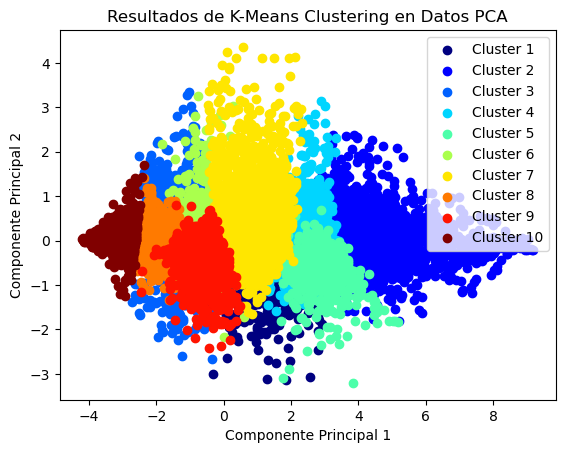

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una lista de colores para cada clúster
num_clusters = len(np.unique(clusters))
colors = plt.cm.jet(np.linspace(0, 1, num_clusters))

# Graficar los datos en el espacio PCA y colorearlos según el clúster al que pertenecen
for cluster_id in range(num_clusters):
    plt.scatter(data_pca[clusters == cluster_id, 0], data_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id+1}', c=[colors[cluster_id]])

# Agregar etiquetas y leyenda
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.title('Resultados de K-Means Clustering en Datos PCA')

# Mostrar el gráfico
plt.show()
